In [10]:
import pandas as pd
# import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [81]:
df=pd.read_csv("C:/Users/00824732/Desktop/streamlit/survey_results_public.csv")

In [82]:
df=df[["Country","YearsCodePro","Employment","ConvertedComp","EdLevel"]]
df=df.rename({"ConvertedComp":"Salary"},axis=1)

In [83]:
df=df[df["Salary"].notnull()]

In [84]:
df=df.dropna()
df.isnull().sum().sum()

0

In [85]:
df_full_time=df[df["Employment"]=="Employed full-time"]

In [86]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]='Other'
    return categorical_map

In [87]:
country_map=shorten_categories(df_full_time.Country.value_counts(),400)
df_full_time['Country']=df_full_time['Country'].map(country_map)
df_full_time.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

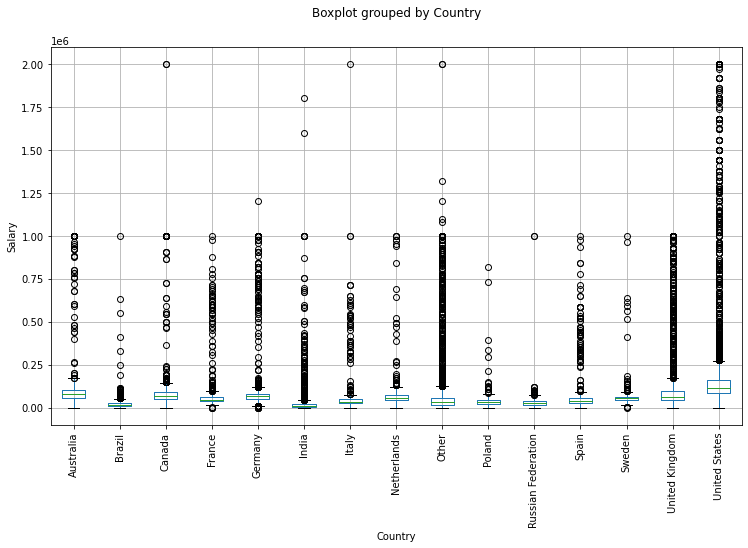

In [88]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df_full_time.boxplot('Salary','Country',ax=ax)
# plt.subtitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [89]:
df_full_time=df_full_time[df_full_time["Salary"]<=25000]
df_full_time=df_full_time[df_full_time["Salary"]>=10000]
df_full_time=df_full_time[df_full_time["Country"]!="Other"]

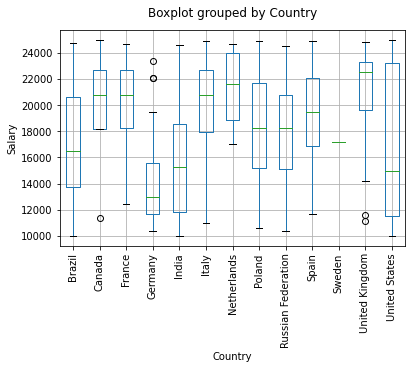

In [29]:
fig,ax=plt.subplots()
df_full_time.boxplot('Salary','Country',ax=ax)
# plt.subtitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [90]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '12', '10', '14', '29',
       '6', '28', '8', '15', '11', '25', 'Less than 1 year', '5', '9',
       '21', '16', '19', '35', '18', '24', '32', '22', '30', '38', '26',
       '17', '27', 'More than 50 years', '40', '33', '34', '36', '39',
       '37', '31', '41', '45', '47', '50', '42', '43', '44', '48', '46',
       '49'], dtype=object)

In [91]:
def clean_experience(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)

In [92]:
df_full_time["EdLevel"].unique()

array(['Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [93]:
df_full_time['YearsCodePro']=df_full_time['YearsCodePro'].apply(clean_experience)

In [94]:
def clean_education(x):
    if 'Bachelor`s Degree':
        return 'Bachelor`s Degree'
    if 'Masters`s Degree':
        return 'Masters`s Degree'
    if 'Professional degree' in x or'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [95]:
df_full_time.columns

Index(['Country', 'YearsCodePro', 'Employment', 'Salary', 'EdLevel'], dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
lb_country=LabelEncoder()
lb_edu=LabelEncoder()
df_full_time['Country']=lb_country.fit_transform(df_full_time['Country'])
df_full_time['EdLevel']=lb_edu.fit_transform(df_full_time['EdLevel'])
df_full_time['EdLevel'].unique()
df_full_time['Country'].unique()


array([ 9,  0,  4, 11,  2,  5,  7, 12,  3,  6,  8,  1, 10])

In [97]:
x=df_full_time.drop(labels=["Salary","Employment"],axis=1)
y=df_full_time["Salary"]

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y.values)

LinearRegression()

In [99]:
y_pred=lr.predict(x)

In [100]:
error=np.sqrt(mean_squared_error(y,y_pred))
error

4181.250894084269

In [101]:
from sklearn.tree import DecisionTreeRegressor
d_tree=DecisionTreeRegressor(random_state=0)
d_tree.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [104]:
y_pred_df=d_tree.predict(x)
y_pred

array([18972.55077272, 17604.60083522, 16291.04494659, ...,
       15922.15126375, 16459.28990374, 19060.90745735])

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x,y.values)

RandomForestRegressor()

In [106]:
y_pred_rf=rf.predict(x)

In [107]:
from sklearn.model_selection import GridSearchCV
max_depth=[None,2,4,6,8,10,12]
parameters={"max_depth":max_depth}
regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(x,y.values)
regressor=gs.best_estimator_
regressor.fit(x,y.values)
y_pred=regressor.predict(x)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$3,844.67


In [119]:
X=np.array([[1,2,15]])
# df=pd.DataFrame(x,columns=['Country','Level','YearsCodePro'])
# df.head()
X

array([[ 1,  2, 15]])

In [123]:
X[:,0]=lb_country.transform(X[0:,])
X[:,1]=lb_edu.transform(X[:,1])
X=X.astype(float)

ValueError: y should be a 1d array, got an array of shape (1, 3) instead.

In [118]:
y_pred=regressor.predict(X)
y_pred

ValueError: could not convert string to float: 'Master`s Degree'

In [ ]:
import pickle
data={"model":regressor,"le_country":lb_country,"le_education":le_education}
with open("saved_steps.pkl",'wb') as file:
    pickle.dump(data,file)
    

In [ ]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
regressor_load=data['model']
le_country=data['le_country']
le_education=data['le_education']


In [ ]:
y_pred=regressor_load.predict(x)
y_pred